<a href="https://colab.research.google.com/github/SeunghyeChae/Pneumonia-Detection_tmdhey/blob/main/Semantic_Segmentation_For_XRay_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/bcabgil/DD2424-Semantic-Segmentation-For-XRay-Images/blob/master/Main_Code.ipynb

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Installing and importing libraries
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install h5py pyyaml
!pip install tf_nightly
!pip install tensorboardcolab


In [ ]:
!pip install -U scipy==1.2.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
# from scipy.misc import imsave
from imageio import imwrite
from imageio import imsave
# from google.colab import drive
# drive.mount('/content/gdrive')
from PIL import Image
from statistics import stdev 
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

# Split data into training (80%), validation (10%) and test (10%) set

In [ ]:
#Splitting the data randomly 
from sklearn.model_selection import train_test_split


#Splitting of the data

X = np.ndarray((246,128,128,1))
Y = np.ndarray((246,128,128,4))

for i in range (1,154):
    if i <10:
        im = Image.open("/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/Converted_Images_PNG/JPCLN00%s.PNG" % (i))
        mask = Image.open("/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/Merged_Masks_PNG/JPCLN00%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        X[i][:][:][:] = im
        Y[i][:][:][:] = mask

    elif (i>=10) and (i<100):
        im = Image.open("/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/Converted_Images_PNG/JPCLN0%s.PNG" % (i))
        mask = Image.open("/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/Merged_Masks_PNG/JPCLN0%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        X[i][:][:][:] = im
        Y[i][:][:][:] = mask

    elif (i>=100):
        if (i == 122):
            continue;
        im = Image.open("/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/Converted_Images_PNG/JPCLN%s.PNG" % (i))
        mask = Image.open("/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/Merged_Masks_PNG/JPCLN%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        X[i][:][:][:] = im
        Y[i][:][:][:] = mask


for i in range(1,94):   
    if i <10:
        im = Image.open("/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/Converted_Images_PNG/JPCNN00%s.PNG" % (i))
        mask = Image.open("/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/Merged_Masks_PNG/JPCNN00%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        X[i][:][:][:] = im
        Y[i][:][:][:] = mask

    elif (i>=10):
        im = Image.open("/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/Converted_Images_PNG/JPCNN0%s.PNG" % (i))
        mask = Image.open("/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/Merged_Masks_PNG/JPCNN0%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        if i<47:
            X[i][:][:][:] = im
            Y[i][:][:][:] = mask
        elif 46<i<72:
            X[i-47][:][:][:] = im
            Y[i-47][:][:][:] = mask
        elif 71<i<94:
            X[i-72][:][:][:] = im
            Y[i-72][:][:][:] = mask

    
#Splitting of data into training, validation and testing
Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.10)
Xtr, Xva, Ytr, Yva = train_test_split(Xtr, Ytr, test_size=0.10)


#Printing shape of Training and Test data
print( Xtr.shape, Ytr.shape)
print( Xtst.shape, Ytst.shape)
print(Xva.shape, Yva.shape)

(198, 128, 128, 1) (198, 128, 128, 4)
(25, 128, 128, 1) (25, 128, 128, 4)
(23, 128, 128, 1) (23, 128, 128, 4)


[[185. 217. 217. ... 217. 217. 185.]
 [217. 255. 255. ... 255. 255. 217.]
 [217. 255. 255. ... 255. 255. 217.]
 ...
 [163. 186. 186. ... 176. 176. 149.]
 [163. 186. 186. ... 176. 176. 149.]
 [139. 158. 158. ... 150. 149. 125.]]


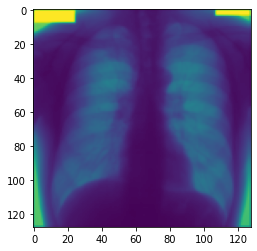

In [ ]:
#Comprovation that the data is correctly imported
plt.imshow(np.reshape(Xtst[2][:][:][:],(128,128)))
print(np.reshape(Xtst[2][:][:][:],(128,128)))

# create model

In [ ]:
#Build the model

#Libraries
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, Dropout,MaxPooling2D,UpSampling2D, Input, ELU, Concatenate, BatchNormalization
from keras.models import load_model
from keras.losses import categorical_crossentropy

In [ ]:

first_input = Input(shape =(128,128,1))
bn = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(first_input)
conv1_1 = Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(bn)
conv1_2=Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(conv1_1)
dropout1 = Dropout(0.1)(conv1_2)
maxPool1 = MaxPooling2D(pool_size=2, strides=1)(dropout1)
conv2_1 = Conv2D(64, [3,3], strides=(2, 2), activation='elu', padding="same")(maxPool1)
conv2_2 = Conv2D(64, [3,3], strides=(1, 1), activation='elu', padding="same")(conv2_1)
dropout2 = Dropout(0.1)(conv2_2)
maxPool2 = MaxPooling2D(pool_size=2, strides=1)(dropout2)
conv3_1 = Conv2D(32, [3,3], strides=(2, 2), activation='elu', padding="same")(maxPool2)
conv3_2 = Conv2D(32, [3,3], strides=(1, 1), activation='elu', padding="same")(conv3_1)
dropout3 = Dropout(0.1)(conv3_2)
maxPool3 = MaxPooling2D(pool_size=2, strides=1)(dropout3)

conv4_1 = Conv2D(16, [3,3], strides=(2, 2), activation='elu', padding="same")(maxPool3)
conv4_2 = Conv2D(16, [3,3], strides=(1, 1), activation='elu', padding="same")(conv4_1)
dropout4 = Dropout(0.1)(conv4_2)

upSampling1 = UpSampling2D(size=(2, 2))(dropout4)

#concatenate
conv_int5 = Conv2D(32, [3,3], strides=(1, 1), activation='elu', padding="same")(upSampling1)
concat1 = Concatenate()([dropout3, conv_int5])

conv5_1 = Conv2D(32, [3,3], strides=(1, 1), activation='elu', padding="same")(concat1)
conv5_2 = Conv2D(32, [3,3], strides=(1, 1), activation='elu', padding="same")(conv5_1)
dropout5 = Dropout(0.1)(conv5_2)
upSampling2 = UpSampling2D(size=(2, 2))(dropout5)
#concatenate
conv_int6 = Conv2D(64, [3,3], strides=(1, 1), activation='elu', padding="same")(upSampling2)
concat2 = Concatenate()([dropout2, conv_int6])

conv6_1 = Conv2D(64, [3,3], strides=(1, 1), activation='elu', padding="same")(concat2)
conv6_2 = Conv2D(64, [3,3], strides=(1, 1), activation='elu', padding="same")(conv6_1)
dropout6 = Dropout(0.1)(conv6_2)
upSampling3 = UpSampling2D(size=(2, 2))(dropout6)

#concatenate
conv_int7 = Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(upSampling3)
concat3 = Concatenate()([dropout1, conv_int7])

conv7_1 = Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(concat3)
conv7_2 = Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(conv7_1)

dropout7 = Dropout(0.1)(conv7_2)

#batch normalization
bn = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(dropout7)

output = Conv2D(4, [1,1], strides=(1, 1), activation='softmax', padding="same")(bn)
#output2 = Conv2D(4, [1,1], strides=(1, 1), activation='softmax', padding="same")(bn)

In [ ]:
#Custom loss function combining categorical cross entropy and dice coefficient 
from keras import backend as K

def loss_tot(y_true, y_pred, smooth=1):
   
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    dice = (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)
    
    return 1-dice+categorical_crossentropy(y_true, y_pred)               

In [ ]:
#Importing an existing model or compiling a newly defined one

#Define the optimizer
from tensorflow.keras.optimizers import Adam

#Parameters for loading an existing model
model_name = 'inversenet.h5'
load_existant = False

if load_existant:
    model = load_model(model_name) 

else:

    model = Model(inputs=first_input, outputs=output)
    model.compile(optimizer='Adadelta', loss=loss_tot, metrics=['acc'])
    model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 128, 128, 1)  4          ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 conv2d_18 (Conv2D)             (None, 128, 128, 12  1280        ['batch_normalization_2[0][0]']  
                                8)                                                          

# Training the model

In [ ]:
#data augmentation 

# Create two instances (images and targets) with the same arguments
data_gen_args = dict(zoom_range=0.01, horizontal_flip=True, vertical_flip = True, rotation_range = 10)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1

#image should have rank 4
image_datagen.fit(Xtr, augment=True, seed=seed)
mask_datagen.fit(Ytr, augment=True, seed=seed)

image_generator = image_datagen.flow(Xtr,seed=seed)

mask_generator = mask_datagen.flow(Ytr,seed=seed)

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

# Early stopping improvement

In [ ]:
#Apply early stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint

tbc=TensorBoardColab()#Tensorboard callback
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience = 100, verbose=0)
check_point = ModelCheckpoint('/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/best_model_cloud_1000.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

Wait for 8 seconds...
TensorBoard link:
http://3a56-35-229-97-207.ngrok.io


# Training

In [ ]:
class_weight= {0:1.217169570760731, 1:5.323420074349443}

In [ ]:
# Train the model, iterating on the data in batches

path_new_model = "/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/cloud1000epochs.h5"


history = model.fit_generator(train_generator, validation_data = (Xva, Yva), verbose = 1, steps_per_epoch=10, epochs=1000, callbacks=[early_stopping,check_point,TensorBoardColabCallback(tbc)], class_weight = class_weight) #steps_per_epoch = data_size/n_batch


#Save final model
model.save(path_new_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


ValueError: ignored

In [ ]:
help(model.fit_generator)

Help on method fit_generator in module keras.engine.training:

fit_generator(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=None, validation_steps=None, validation_freq=1, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0) method of keras.engine.functional.Functional instance
    Fits the model on data yielded batch-by-batch by a Python generator.
    
    DEPRECATED:
      `Model.fit` now supports generators, so there is no longer any need to use
      this endpoint.



In [ ]:
# 안되는이유: 직접 segment한 png파일들 합친게 없음

In [ ]:
# https://github.com/ICRAR/PHYS5511/blob/3b7665b470719b5b1d6d14a48beebe19c6b7e38c/2019/week09/lung_segmentation_from_chest_x_ray_dataset.ipynb